## Discretisation

Discretisation is the process of transforming continuous variables into discrete variables by creating a set of contiguous intervals that span the range of the variable's values. Discretisation is also called **binning**, where bin is an alternative name for interval.


### Discretisation helps handle outliers and may improve value spread in skewed variables

Discretisation helps handle outliers by placing these values into the lower or higher intervals, together with the remaining inlier values of the distribution. Thus, these outlier observations no longer differ from the rest of the values at the tails of the distribution, as they are now all together in the same interval / bucket. In addition, by creating appropriate bins or intervals, discretisation can help spread the values of a skewed variable across a set of bins with equal number of observations.


### Discretisation approaches

There are several approaches to transform continuous variables into discrete ones. Discretisation methods fall into 2 categories: **supervised and unsupervised**. Unsupervised methods do not use any information, other than the variable distribution, to create the contiguous bins in which the values will be placed. Supervised methods typically use target information in order to create the bins or intervals.


####  Unsupervised discretisation methods

- Equal width discretisation
- Equal frequency discretisation
- K-means discretisation

#### Supervised discretisation methods

- Discretisation using decision trees


In this lecture, I will describe **equal frequency discretisation**.


## Equal frequency discretisation

Equal frequency discretisation divides the scope of possible values of the variable into N bins, where each bin carries the same amount of observations. This is particularly useful for skewed variables as it spreads the observations over the different bins equally. We find the interval boundaries by determining the quantiles.

Equal frequency discretisation using quantiles consists of dividing the continuous variable into N quantiles, N to be defined by the user.

Equal frequency binning is straightforward to implement and by spreading the values of the observations more evenly it may help boost the algorithm's performance. This arbitrary binning may also disrupt the relationship with the target.

## In this demo

We will learn how to perform equal frequency discretisation using the Titanic dataset with

- pandas and NumPy
- Feature-engine
- Scikit-learn

## Titanic dataset

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import KBinsDiscretizer


In [2]:
# load the numerical variables of the Titanic Dataset

data = __.________('.../titanic.csv',
                   usecols=['age', 'fare', 'survived'])

# Retrieve 1st 5 rows
data.____()

,survived,age,fare
0,1,29.0000,211.3375
1,1,0.9167,151.5500
2,0,2.0000,151.5500
3,0,30.0000,151.5500
4,0,25.0000,151.5500


In [3]:
# Let's separate into train and test set

X_train, X_test, y_train, y_test = ________________(
    data[['age', 'fare']],
    data['survived'],
    test_size=0.3,
    random_state=0)

# Get X_train and X_test dimensions
X_train._____, X_test._____

((916, 2), (393, 2))

The variables Age and Fare contain missing data, that I will fill by extracting a random sample of the variable.

In [4]:
def impute_na(data, variable):
    # function to fill NA with a random sample

    df = data.copy()

    # random sampling
    df[variable+'_random'] = df[variable]

    # extract the random sample to fill the na
    random_sample = X_train[variable].dropna().sample(
        df[variable].isnull().sum(), random_state=0)

    # pandas needs to have the same index in order to merge datasets
    random_sample.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(), variable+'_random'] = random_sample

    return df[variable+'_random']

In [5]:
# replace NA in both train and test sets using created function on both variables 'age' and 'fare'



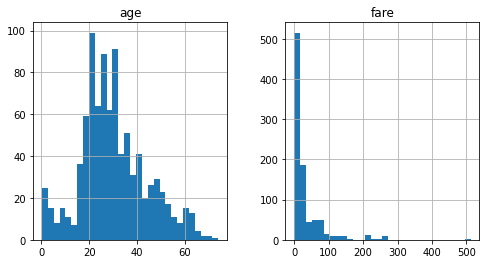

In [6]:
# let's explore the distribution of age and fare by ploting histogram of 30 bin

X_traina[['___', '____']].____(bins=__, figsize=(8,4))
plt.___()

## Equal frequency discretisation with pandas and NumPy

The interval limits are the quantile limits. We can find those out with pandas qcut.

In [7]:
# let's use pandas qcut (quantile cut) and I indicate that
# we want 10 bins.

# retbins = True indicates that I want to capture the limits
# of each interval (so I can then use them to cut the test set)

Age_disccretised, intervals = pd.____(
    X_train['age'], 10, labels=None, retbins=True, precision=3, duplicates='raise')

# retrieve 1st 10 rows
pd.concat([Age_disccretised, X_train['age']], axis=1).____(__)

,age,age
501,"(0.166, 16.0]",13.0
588,"(0.166, 16.0]",4.0
402,"(28.0, 31.0]",30.0
1193,"(20.0, 22.25]",21.0
686,"(20.0, 22.25]",22.0
971,"(0.166, 16.0]",16.0
117,"(28.0, 31.0]",30.0
540,"(0.166, 16.0]",2.0
294,"(42.0, 50.0]",49.0
261,"(31.0, 36.0]",35.0


We can see in the above output how by discretising using quantiles, we placed each Age observation within one interval. For example, age 29 was placed in the 26-30 interval, whereas age 63 was placed into the 49-80 interval. 

Note how the interval widths are different.

We can visualise the interval cut points below:

In [8]:
intervals

array([ 0.1667, 16.    , 20.    , 22.25  , 25.    , 28.    , 31.    ,
       36.    , 42.    , 50.    , 74.    ])

And because we generated the bins using the quantile cut method, we should have roughly the same amount of observations per bin. See below.

In [9]:
# roughly the same number of passengers per interval - count values in Age_disccretised

Age_disccretised.____________()

(31.0, 36.0]     106
(0.166, 16.0]    103
(25.0, 28.0]      95
(22.25, 25.0]     94
(42.0, 50.0]      92
(28.0, 31.0]      91
(16.0, 20.0]      91
(36.0, 42.0]      84
(20.0, 22.25]     81
(50.0, 74.0]      79
Name: age, dtype: int64

In [10]:
# we can also add labels instead of having the interval boundaries, to the bins, as follows:

labels = ['Q'+ ____ for i in range(1,11)]
labels

['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10']

In [11]:
# Use pandas qcut (quantile cut) with 10 bins and labels as the defined before.
Age_disccretised, intervals = pd.qcut(X_train['age'], __, labels=______,
                                      retbins=True,
                                      precision=3, duplicates='raise')

# retrieve 1st 5 rows
Age_disccretised._____()

501     Q1
588     Q1
402     Q6
1193    Q3
686     Q3
Name: age, dtype: category
Categories (10, object): ['Q1' < 'Q2' < 'Q3' < 'Q4' ... 'Q7' < 'Q8' < 'Q9' < 'Q10']

In [12]:
# to transform the test set:
# we use pandas cut method (instead of qcut) and
# pass the quantile edges calculated in the training set

X_test['Age_disc_label'] = pd.___(x = X_test['age'], bins=intervals, labels=labels)
X_test['Age_disc'] = pd.___(x = X_test['age'], bins=intervals)

# retrieve 1st 10 rows
X_test.____(__)

,age,fare,Age_disc_label,Age_disc
1139,38.0,7.8958,Q8,"(36.0, 42.0]"
533,21.0,21.0000,Q3,"(20.0, 22.25]"
459,42.0,27.0000,Q8,"(36.0, 42.0]"
1150,34.0,14.5000,Q7,"(31.0, 36.0]"
393,25.0,31.5000,Q4,"(22.25, 25.0]"
1189,4.0,16.7000,Q1,"(0.167, 16.0]"
5,48.0,26.5500,Q9,"(42.0, 50.0]"
231,52.0,30.5000,Q10,"(50.0, 74.0]"
330,57.0,13.0000,Q10,"(50.0, 74.0]"
887,32.0,8.1125,Q7,"(31.0, 36.0]"


<AxesSubplot:xlabel='Age_disc'>

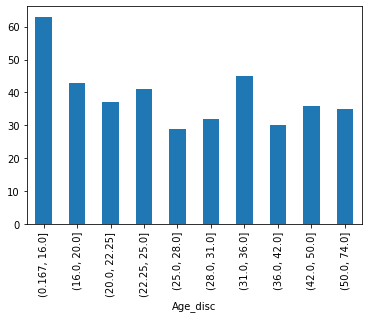

In [13]:
# let's check that we have equal frequency (equal number of observations per bin) 
# so we need to bar plot counts
X_test.groupby('Age_disc')['age']._____().____.___()

We can see that the top intervals have less observations. This may happen with skewed distributions if we try to divide in a high number of intervals. To make the value spread  more homogeneous, we should discretise in less intervals.

## Equal frequency discretisation with Scikit-learn

In [22]:
# Let's separate into train and test set

X_train, X_test, y_train, y_test = ________________(
    data[['age', 'fare']],
    data['survived'],
    test_size=0.3,
    random_state=0)

# Get X_train and X_test dimensions
X_train._____, X_test._____

((916, 2), (393, 2))

In [23]:
# replace NA in both  train and test sets on both 'age' and 'fare'


In [24]:
# Create 10 binned using Scikit learn 
disc = KBinsDiscretizer(n_bins=__, encode='ordinal', strategy='quantile')

# fit it on train dataset on both variables ‘age’ and ‘fare’
disc.___(_______[['___', '____']])

KBinsDiscretizer(encode='ordinal', n_bins=10)

In [25]:
# Retrieve ‘age’ and ‘fare’ limits intervals using bin_edges_
disc._________

array([array([ 0.1667, 16.    , 20.    , 22.25  , 25.    , 28.    , 31.    ,
       36.    , 42.    , 50.    , 74.    ]),
       array([  0.    ,   7.55  ,   7.7958,   8.05  ,  10.5   ,  14.4542,
        21.075 ,  26.55  ,  40.125 ,  79.025 , 512.3292])], dtype=object)

In [26]:
# Transform discretization on X_train on both variables 'age' and 'fare'
train_t = disc._________(X_train[['___', '____']])

# create Dataframe of tranformed tarin dataset
train_t = __._________(train_t, columns = ['___', '____'])

# retrieve 1st 5 rows
train_t._____()

,age,fare
0,0.0,5.0
1,0.0,6.0
2,5.0,4.0
3,2.0,1.0
4,2.0,1.0


In [27]:
# Transform discretization on X_test on both variables 'age' and 'fare'
test_t = disc._________(______[['___', '____']])

# create Dataframe of tranformed tarin dataset
test_t = __._________(_______, columns = ['___', '____'])

Text(0, 0.5, 'Number of observations per bin')

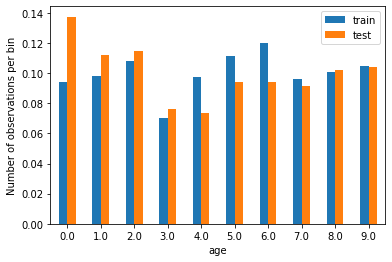

In [28]:
# Plot a bar graph for X_train and X_test on variable on variable ‘age’ percentage per interval
t1 = train_t._______('age')['age']._____()/ 
t2 = test_t._______('age')['age']._____()/ 

tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']
tmp.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of observations per bin')

Text(0, 0.5, 'Number of observations per bin')

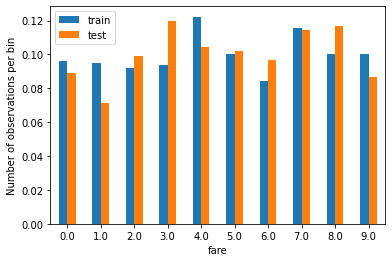

In [29]:
# Plot a bar graph for discretized X_train and X_test on variable ‘fare’ percentage per interval
t1 = train_t._______('fare')['fare']._____()/ ___(_______)
t2 = test_t._______('fare')['fare']._____().____/ ___(______)

tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']
tmp.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of observations per bin')